In [37]:
# Importing core libraries
import numpy as np
import pandas as pd
from time import time
import pprint
import joblib
import global_variables as gv
import utilities
import matplotlib.pyplot as plt

# Model selection
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold
from tensorflow.keras.initializers import RandomNormal, Constant

# Metrics
from sklearn.metrics import roc_auc_score, average_precision_score
from sklearn.metrics import make_scorer

# Data transformation pipelines
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import QuantileTransformer, RobustScaler, StandardScaler,MinMaxScaler

# Graphics
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Dense, PReLU, BatchNormalization
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import StratifiedKFold
from sklearn.pipeline import Pipeline
import keras
import tensorflow as tf
from keras import backend as K
from keras import metrics
from keras import regularizers
from keras.models import Sequential, load_model
from keras.layers import Dense, Dropout, Flatten, Activation, Concatenate
from tensorflow.keras.optimizers  import Adam, Adagrad, SGD
from keras.callbacks import TensorBoard, EarlyStopping, ModelCheckpoint

In [3]:
# Importing from Scikit-Learn
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA, FactorAnalysis

from keras.layers import Input, Embedding, Reshape
from keras.layers import Flatten, concatenate, Concatenate, Lambda, Dropout
from keras.layers import Activation, LeakyReLU
from keras.models import Model, load_model
from keras.losses import binary_crossentropy

In [ ]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:80% !important; }</style>"))

In [16]:
df = pd.read_csv('binary_full.csv')
pd.set_option('display.max_columns', None)
df.drop('Unnamed: 0', axis=1, inplace=True)
df.head()

,1319-0.0,1408-0.0,1329-0.0,1448-0.0,1538-0.0,6142-0.0,2050-0.0,1508-0.0,1339-0.0,30710-0.0,1349-0.0,30750-0.0,1468-0.0,20117-0.0,30740-0.0,1160-0.0,2090-0.0,31-0.0,1488-0.0,30850-0.0,4080-0.0,1369-0.0,21000-0.0,1200-0.0,1289-0.0,30790-0.0,845-0.0,48-0.0,30630-0.0,1299-0.0,1220-0.0,1548-0.0,1528-0.0,23099-0.0,49-0.0,30690-0.0,1389-0.0,2654-0.0,1249-0.0,1309-0.0,1379-0.0,1239-0.0,21003-0.0,30780-0.0,1438-0.0,30870-0.0,1359-0.0,30770-0.0,21001-0.0,1458-0.0,23100-0.0,6138-0.0,1418-0.0,1478-0.0,4079-0.0,30760-0.0,23101-0.0,2100-0.0,1428-0.0,30640-0.0,hypertension,outcome_cardiomyopathies,outcome_ischemic_heart_disease,outcome_heart_failure,outcome_peripheral_vascular_disease,outcome_cardiac_arrest,outcome_cerebral_infarction,outcome_arrhythmia,outcome_myocardial_infarction,CVD,age,sex,race,age-binned,race-binary
0,0.0,1.0,2.0,3.0,2.0,1.0,2.0,3.0,2.0,0.34,1.0,34.937,3.0,2.0,5.622,7.0,1.0,0.0,6.00,0.508,110.0,1.0,1001.0,3.0,6.0,54.4035,20.90,74.0,1.593,10.0,0.0,2.0,2.00,35.6,102.0,6.477,1.0,6.0,1.0,2.0,1.0,0.0,54.0,3.888,10.0,0.977,2.0,26.339,24.5790,3.86,25.0,1.0,3.0,1.0,77.0,1.706,45.2,1.0,0.0,1.211,0,0,0,0,0,0,0,1,0,1,54.0,Female,British,50-59,1
1,0.0,3.0,2.0,1.0,0.0,1.0,1.0,2.0,2.0,3.94,4.0,40.900,5.0,2.0,5.052,9.0,0.0,1.0,2.00,13.088,166.0,2.0,1001.0,2.0,2.0,15.4000,16.00,120.0,1.390,2.0,0.0,2.0,2.47,36.5,113.0,5.512,1.0,7.0,1.0,1.0,2.0,0.0,65.0,3.520,12.0,2.358,3.0,10.701,35.0861,7.00,42.9,3.0,2.0,1.0,91.0,1.173,74.6,0.0,1.0,1.019,1,0,1,0,0,0,0,0,1,0,65.0,Male,British,60-69,1
2,0.0,3.0,3.0,2.0,1.0,2.0,1.0,2.0,2.0,0.55,1.0,40.000,1.0,0.0,5.310,5.0,0.0,0.0,0.00,0.515,132.0,1.0,1001.0,3.0,2.0,32.1000,16.00,66.0,2.005,4.0,0.0,1.0,1.00,29.5,88.0,7.079,1.0,7.0,3.0,4.0,2.0,0.0,69.0,4.227,8.0,0.655,2.0,10.693,19.3835,7.00,15.2,3.0,2.0,1.0,67.0,2.490,36.3,0.0,1.0,1.097,0,0,0,0,0,0,0,0,0,0,69.0,Female,British,60-69,1
3,3.0,3.0,3.0,3.0,0.0,2.0,1.0,2.0,2.0,0.45,2.0,37.300,4.0,2.0,4.449,7.0,0.0,1.0,5.00,4.675,178.0,2.0,1001.0,1.0,3.0,43.5620,18.00,110.0,1.474,2.0,0.0,1.0,2.00,28.5,117.0,5.028,0.0,7.0,1.0,1.0,2.0,1.0,66.0,3.041,10.0,3.108,2.0,25.317,35.1281,7.00,31.7,3.0,2.0,1.0,84.0,1.169,79.6,0.0,3.0,0.923,0,0,0,0,0,0,0,0,0,0,66.0,Male,British,60-69,1
4,0.0,3.0,2.0,1.0,0.0,5.0,2.0,2.0,2.0,0.75,2.0,32.200,1.0,2.0,4.616,6.0,0.0,1.0,3.04,20.162,178.0,1.0,1001.0,3.0,1.0,71.1100,22.38,94.0,2.149,1.0,0.0,2.0,2.00,24.8,100.0,7.958,1.0,7.0,2.0,1.0,1.0,0.0,48.0,4.983,8.0,1.173,1.0,26.523,25.8866,1.00,20.1,1.0,2.0,1.0,88.0,2.053,61.0,0.0,3.0,1.443,0,0,0,0,0,0,0,0,0,0,48.0,Male,British,40-49,1


#### Registering custom activations suitable for tabular problems

In [5]:
from tensorflow.keras.utils import get_custom_objects
from tensorflow.keras.layers import Activation, LeakyReLU
import utilities

class Mish(Activation):
    '''
    .. math::
        mish(x) = x * tanh(softplus(x)) = x * tanh(ln(1 + e^{x}))
    Shape:
        - Input: Arbitrary. Use the keyword argument `input_shape`
        (tuple of integers, does not include the samples axis)
        when using this layer as the first layer in a model.
        - Output: Same shape as the input.
    Examples:
        >>> X = Activation('Mish', name="conv1_act")(X_input)
    '''

    def __init__(self, activation, **kwargs):
        super(Mish, self).__init__(activation, **kwargs)
        self.__name__ = 'Mish'
        
def mish(inputs):
    return inputs * tf.math.tanh(tf.math.softplus(inputs))


# Add gelu so we can use it as a string
get_custom_objects().update({'gelu': Activation(utilities.gelu)})

# Add mish so we can use it as a string
get_custom_objects().update({'mish': Mish(mish)})

# Add leaky-relu so we can use it as a string
get_custom_objects().update({'leaky-relu': Activation(LeakyReLU(alpha=0.2))})

### Build MLP Model

#### add batch normalization, custom activation

In [18]:
def mlp_model( X_train, X_val, y_val, y_train, X_test, y_test, epochs, batch, activation='tanh',opt=SGD, lr=0.000001):
    
    # define model
    model = Sequential()
    model.add(Dense(1000, activation=activation , input_shape=(X_train.shape[1],)))
    model.add(Dense(500, activation=activation))
    model.add(Dense(500, activation=activation ))
    model.add(Dense(200, activation=activation ))
    model.add(Dense(1, activation=tf.nn.sigmoid))
    
    # compile model
    model.compile(
        loss="binary_crossentropy",
        optimizer=opt(learning_rate=lr),
        metrics=['acc',tf.keras.metrics.AUC(), utilities.recall_m])

    # fit model on train set
    history = model.fit(
        X_train, y_train,
        batch_size=batch,
        epochs=epochs,
        shuffle=True,
        verbose=1,
        validation_data=(X_val, y_val),
    )
    score = model.evaluate(X_test, y_test, verbose=0)
    return history, score

In [41]:
def mlp_model( X_train, X_val, y_val, y_train, X_test, y_test, epochs, batch, activation='tanh',opt=SGD, lr=0.000001):
    
    # define model
    model = Sequential()
    model.add(Dense(1000, activation=activation , input_shape=(X_train.shape[1],)))
    # model.add(BatchNormalization())
    model.add(Dense(500, activation=activation))
    # model.add(BatchNormalization())
    model.add(Dense(500, activation=activation ))
    # model.add(BatchNormalization())
    model.add(Dense(200, activation=activation ))
    # BatchNormalization(
    #     momentum=0.95, 
    #     epsilon=0.005,
    #     beta_initializer=RandomNormal(mean=0.0, stddev=0.05), 
    #     gamma_initializer=Constant(value=0.9)
    # ),
    # model.add(Dense(1, activation=tf.nn.sigmoid))
    
    # compile model
    model.compile(
        loss="binary_crossentropy",
        optimizer=opt(learning_rate=lr),
        metrics=['acc',tf.keras.metrics.AUC(), utilities.recall_m])

    # fit model on train set
    history = model.fit(
        X_train, y_train,
        batch_size=batch,
        epochs=epochs,
        shuffle=True,
        verbose=1,
        validation_data=(X_val, y_val),
    )
    score = model.evaluate(X_test, y_test, verbose=0)
    return history, score

In [39]:
epochs =300
batch = 400
sample_methods =['ADASYN', 'over', 'under', 'partial_under']
activations=['relu', 'tanh', tf.keras.activations.gelu]
optimizers = [SGD, Adam, Adagrad]
num_transformers = [StandardScaler(), MinMaxScaler(), QuantileTransformer(output_distribution='uniform')]
# test one_hot==True/False

In [42]:
X_train, X_val, X_test, y_train, y_val, y_test = utilities.process_features(df, 'CVD', StandardScaler(), one_hot=True)
X_train, y_train= utilities.resample_data(X_train, y_train, 'under')
    
# # evaluate model with a given number of nodes
# history, result = mlp_model( X_train, X_val, y_val, y_train, X_test, y_test, epochs, batch, activation='gelu',opt=Adam, lr=0.000001)

# # summarize final test set accuracy
# print('loss=%.3f  accuracy=%.3f  F1-score=%.3f  Precision=%.3f  Recall=%.3f' % (result[0], result[1], result[2], result[3], result[4]))

# # plot learning curves
# utilities.plot_history(history, ['acc', 'f1_m', 'recall_m' ,'precision_m'])
# plt.suptitle('CVD Basic')

In [45]:
from tensorflow.keras.optimizers.schedules import PolynomialDecay

lr_schedule = PolynomialDecay(0.003, 5000,0.001, power=1.5)
history, result = mlp_model( X_train, X_val, y_val, y_train, X_test, y_test, epochs, batch, activation='tanh',opt=SGD, lr=0.001)

# summarize final test set accuracy
print('loss=%.3f  accuracy=%.3f  AUC=%.3f   Recall=%.3f' % (result[0], result[1], result[2], result[3]))

# plot learning curves
utilities.plot_history(history, ['acc', 'f1_m', 'recall_m' ,'precision_m'])
plt.suptitle('CVD Basic')

Epoch 1/300


ValueError: ignored

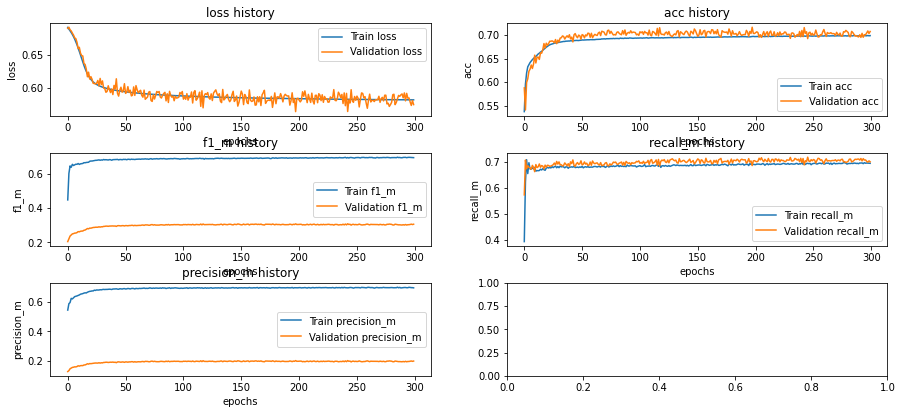

Text(0.5, 0.98, 'CVD Basic')

<Figure size 432x288 with 0 Axes>

In [ ]:
def plot_history(history, measures):
    """
    history: Keras training history
    measures = list of names of measures
    """
    rows = len(measures) // 2 + len(measures) % 2
    fig, panels = plt.subplots(rows, 2, figsize=(15, 5))
    plt.subplots_adjust(top = 0.99, bottom=0.01, hspace=0.4, wspace=0.2)
    try:
        panels = [item for sublist in panels for item in sublist]
    except:
        pass
    for k, measure in enumerate(measures):
        panel = panels[k]
        panel.set_title(measure + ' history')
        panel.plot(history.epoch, history.history[measure], label="Train "+measure)
        panel.plot(history.epoch, history.history["val_"+measure], label="Validation "+measure)
        panel.set(xlabel='epochs', ylabel=measure)
        panel.legend()
        
    plt.show(fig)

plot_history(history, ['loss','acc', 'f1_m', 'recall_m' ,'precision_m'])
plt.suptitle('CVD Basic')

In [ ]:
# Test numerical transformers
save_history = pd.DataFrame()
for param in num_transformers:
    
    X_train, X_val, X_test, y_train, y_val, y_test = utilities.process_features(df, 'outcome_arrhythmia', param, one_hot=True)
    X_train, y_train= utilities.resample_data(X_train, y_train, 'under')
    
    # evaluate model with a given number of nodes
    history, result = mlp_model( X_train, X_val, y_val, y_train, X_test, y_test, epochs, batch, activation='tanh',opt=SGD, lr=0.000001)
    save_history['loss_'+str(n_nodes)]=history.history["loss"]
    save_history['acc_'+str(n_nodes)]=history.history["acc"]
    save_history['f1'+str(n_nodes)]=history.history["f1_m"]
    save_history['recall'+str(n_nodes)]=history.history["recall_m"]


    # summarize final test set accuracy
    print('loss=%.3f  accuracy=%.3f  F1-score=%.3f  Precision=%.3f  Recall=%.3f' % (result[0], result[1], result[2], result[3], result[4]))
    
    # plot learning curves
    utilities.plot_history(history)
    plt.suptitle(str(param))

plot_compare(save_history.loc[:,save_history.columns.to_list()[3::4]], 'Recall')

In [ ]:
# Test sample methods
save_history = pd.DataFrame()
for param in sample_methods:
    
    X_train, X_val, X_test, y_train, y_val, y_test = utilities.process_features(df, 'outcome_arrhythmia')
    X_train, y_train= utilities.resample_data(X_train, y_train, param)
    
    # evaluate model with a given number of nodes
    history, result = mlp_model(X_train, X_val, y_val, y_train, X_test, y_test, epochs, batch,opt=SGD, lr=0.000001)
    save_history['loss_'+str(n_nodes)]=history.history["loss"]
    save_history['acc_'+str(n_nodes)]=history.history["acc"]
    save_history['f1'+str(n_nodes)]=history.history["f1_m"]
    save_history['recall'+str(n_nodes)]=history.history["recall_m"]


    # summarize final test set accuracy
    print('nodes=%d  loss=%.3f  accuracy=%.3f  F1-score=%.3f  Precision=%.3f  Recall=%.3f' % (n_nodes, result[0], result[1], result[2], result[3], result[4]))
    
    # plot learning curves
    utilities.plot_history(history)
    plt.suptitle(str(param))

plot_compare(save_history.loc[:,save_history.columns.to_list()[3::4]], 'Recall')

In [ ]:
# Test activations
activations = ['tanh']
save_history = pd.DataFrame()
for param in activations:
    
    X_train, X_val, X_test, y_train, y_val, y_test = utilities.process_features(df, 'outcome_arrhythmia')
    X_train, y_train= utilities.resample_data(X_train, y_train, 'under')
    
    # evaluate model with a given number of nodes
    history, result = mlp_model(X_train, X_val, y_val, y_train, X_test, y_test, epochs, batch, activation=param,opt=SGD, lr=0.0001) #lr = 0.0002
    save_history['loss_']=history.history["loss"]
    save_history['acc_']=history.history["acc"]
    save_history['f1']=history.history["f1_m"]
    save_history['recall']=history.history["recall_m"]


    # summarize final test set accuracy
    print('nodes=%d  loss=%.3f  accuracy=%.3f  F1-score=%.3f  Precision=%.3f  Recall=%.3f' % (n_nodes, result[0], result[1], result[2], result[3], result[4]))
    
    # plot learning curves
    utilities.plot_history(history)
    plt.suptitle(str(param))

plot_compare(save_history.loc[:,save_history.columns.to_list()[3::4]], 'Recall')

In [ ]:
# Test optimizers

optimizers =[Adam]
save_history = pd.DataFrame()
for param in optimizers:
    
    X_train, X_val, X_test, y_train, y_val, y_test = utilities.process_features(df, 'outcome_arrhythmia')
    X_train, y_train= utilities.resample_data(X_train, y_train, 'under')
    
    # evaluate model with a given number of nodes
    history, result = mlp_model(X_train, X_val, y_val, y_train, X_test, y_test, epochs, batch, activation='tanh',opt=param, lr=0.000002)
    save_history['loss_']=history.history["loss"]
    save_history['acc_']=history.history["acc"]
    save_history['f1']=history.history["f1_m"]
    save_history['recall']=history.history["recall_m"]


    # summarize final test set accuracy
    print('loss=%.3f  accuracy=%.3f  F1-score=%.3f  Precision=%.3f  Recall=%.3f' % (result[0], result[1], result[2], result[3], result[4]))
    
    # plot learning curves
    utilities.plot_history(history)
    plt.suptitle(str(param))


In [ ]:
result

#### Learning Rate Schedulers

In [ ]:
# learning rate schedule
def step_decay(epoch):
    initial_lrate = 0.1
    drop = 0.5
    epochs_drop = 10.0
    lrate = initial_lrate * math.pow(drop, math.floor((1+epoch)/epochs_drop))
    return lrate

In [ ]:
# Test opt opt params

learning_rates = [1e-3, 1e-4, 1e-6, some_changing_thing()]
beta1, beta2 = [1,2,3,4], [1,2,3,4]
save_history = pd.DataFrame()
for param in optimizers:
    
    X_train, X_val, X_test, y_train, y_val, y_test = process_features(df, 'outcome_arrhythmia', QuantileTransformer(output_distribution='uniform'), one_hot=True)
    X_train, y_train= resample_data(X_train, y_train, 'under')
    
    # evaluate model with a given number of nodes
    history, result = basic_model(n_nodes, X_train, X_val, y_val, y_train, X_test, y_test, epochs, batch, activation='relu',opt=param, lr=0.000001)
    save_history['loss_'+str(n_nodes)]=history.history["loss"]
    save_history['acc_'+str(n_nodes)]=history.history["acc"]
    save_history['f1'+str(n_nodes)]=history.history["f1_m"]
    save_history['recall'+str(n_nodes)]=history.history["recall_m"]


    # summarize final test set accuracy
    print('nodes=%d  loss=%.3f  accuracy=%.3f  F1-score=%.3f  Precision=%.3f  Recall=%.3f' % (n_nodes, result[0], result[1], result[2], result[3], result[4]))
    
    # plot learning curves
    plot_history(history)
    plt.suptitle(str(param))

plot_compare(save_history.loc[:,save_history.columns.to_list()[3::4]], 'Recall')

### Build MLP Model with Embeddings

In [ ]:
def build_categorical_inputs(features):

    initial_inputs = {}
    cat_input_layers={}
    
    train_test_cat_features = pd.concat([X_train[categorical_cols], X_test[categorical_cols]])
    
    for feature in features:
        no_of_unique_cats  = train_test_cat_features[feature].nunique()
        embedding_size = int(min(np.ceil((no_of_unique_cats)/2), 50))
        categories  = no_of_unique_cats + 1

        initial_inputs[feature] = Input(shape=(1,))
        embedding_layer = Embedding(categories, 
                                    embedding_size,
                                    embeddings_regularizer=regularizers.l2(0.01),
                                    input_length=1)(initial_inputs[feature])
        cat_input_layers[feature] = Reshape(target_shape=(embedding_size,))(embedding_layer)

    return initial_inputs, cat_input_layers

In [ ]:
def build_model( X_train, X_val, y_val, y_train, X_test, y_test, epochs, batch):
    
    models = []
    for categorical_var in categorical_cols :
        model = Sequential()
        no_of_unique_cat  = X_train[categorical_var].nunique()
        embedding_size = min(np.ceil((no_of_unique_cat)/2), 50 )
        embedding_size = int(embedding_size)
        vocab  = no_of_unique_cat+1
        model.add( Embedding(vocab ,embedding_size, input_length = 1 ))
        model.add(Reshape(target_shape=(embedding_size,)))
        models.append( model )
        
    model_rest = Sequential()
    model_rest.add(Dense(16, input_dim= X_train[numerical_cols+continuous_cols].shape[1]))
    models.append(model_rest)

    full_model = Sequential()
    full_model.add(Concatenate(models))
    full_model.add(Dense(1000))
    full_model.add(Activation('relu'))
    full_model.add(Dense(400))
    full_model.add(Activation('relu'))
    full_model.add(Dense(1))
    full_model.add(Activation('sigmoid'))
    
    # compile model
    model.compile(
        loss="binary_crossentropy",
        optimizer=Adam(learning_rate=0.000001),
        metrics=['acc',f1_m,precision_m, recall_m])

    # fit model on train set
    history = model.fit(
        X_train, y_train,
        batch_size=batch,
        epochs=epochs,
        shuffle=True,
        verbose=1,
        validation_data=(X_val, y_val),
    )
    score = model.evaluate(X_test, y_test, verbose=0)
    return history, score

In [ ]:
def build_model( X_train, X_val, X_test ,y_train, y_val, y_test, epochs, batch):
    
    # define model
    model = Sequential()
    for col in categorical_cols:
        no_of_unique_cat  = X_train[col].nunique()
        embedding_size = min(np.ceil((no_of_unique_cat)/2), 50)
        embedding_size = int(embedding_size)
        vocab  = no_of_unique_cat+1
        model.add(Embedding(input_dim=no_of_unique_cat, output_dim=embedding_size, input_shape=(X_train.shape[1],)))
    model.add(Flatten())

    model.add(Dense(50, activation=tf.keras.activations.gelu ))
    model.add(Dense(1, activation=tf.nn.sigmoid))
    
    # compile model
    model.compile(
        loss="binary_crossentropy",
        optimizer=Adam(learning_rate=0.000001),
        metrics=['acc',f1_m,precision_m, recall_m])

    # fit model on train set
    history = model.fit(
        X_train, y_train,
        batch_size=batch,
        epochs=epochs,
        shuffle=True,
        verbose=1,
        validation_data=(X_val, y_val),
    )
    score = model.evaluate(X_test, y_test, verbose=0)
    return history, score

In [ ]:
X_train, X_val, X_test, y_train, y_val, y_test = process_features(df, 'outcome_arrhythmia', QuantileTransformer(output_distribution='uniform'), one_hot=False)
X_train, y_train= resample_data(X_train, y_train, 'under')
model=build_model(X_train, X_val, X_test ,y_train, y_val, y_test, 400, 600)

In [ ]:
initial_inputs, input_layers = build_categorical_inputs(categorical_cols)

no_of_num_features = len(X_train.columns) - len(categorical_cols)

initial_inputs['numerical_features'] = Input(shape=(no_of_num_features,))
input_layers['numerical_features'] = initial_inputs['numerical_features']

inputs = Concatenate(axis=-1)([layer for layer in input_layers.values()])

In [ ]:
models = []

model_rest = Sequential()
model_rest.add(Dense(100, input_dim= len(numerical_cols+continuous_cols) ))
models.append(model_rest)

for categorical_var in categorical_cols :
     
    model = Sequential()
    no_of_unique_cat  = X_train[categorical_var].nunique()
    
    # jeremy howard rule
    embedding_size = min(np.ceil((no_of_unique_cat)/2), 50 )
    embedding_size = int(embedding_size)
    vocab  = no_of_unique_cat+1
    model.add( Embedding(vocab ,embedding_size, input_length = 1 ))
    model.add(Reshape(target_shape=(embedding_size,)))
    models.append( model )


    full_model = Sequential()
    full_model.add(Concatenate(models))
    full_model.add(Dense(1000))
    full_model.add(Activation('relu'))
    full_model.add(Dense(400))
    full_model.add(Activation('relu'))
    full_model.add(Dense(200))
    full_model.add(Activation('sigmoid'))
    full_model.add(Dense(1))
    full_model.add(Activation('sigmoid'))

    optimizer = tf.keras.optimizers.Adam(learning_rate=0.000001)

    model.compile(loss='binary_crossentropy',
                  optimizer=optimizer,
                  metrics=['acc',f1_m,precision_m, recall_m])

In [ ]:
batch=1000
epochs=100
# fit model on train set
history = model.fit(
    X_train, y_train,
    batch_size=batch,
    epochs=epochs,
#     shuffle=True,
    verbose=1,
    validation_data=(X_val, y_val),
)
score = model.evaluate(X_test, y_test, verbose=0)

### K-fold cross validation

In [ ]:
# Merge inputs and targets
inputs = np.concatenate((input_train, input_test), axis=0)
targets = np.concatenate((target_train, target_test), axis=0)

# Define the K-fold Cross Validator
kfold = KFold(n_splits=num_folds, shuffle=True)

# K-fold Cross Validation model evaluation
fold_no = 1
for train, test in kfold.split(inputs, targets):

    # Define the model architecture
    full_model = Sequential()
    full_model.add(Concatenate(models))
    full_model.add(Dense(1000))
    full_model.add(Activation('relu'))
    full_model.add(Dense(400))
    full_model.add(Activation('relu'))
    full_model.add(Dense(200))
    full_model.add(Activation('sigmoid'))
    full_model.add(Dense(1))
    full_model.add(Activation('sigmoid'))

    # Compile the model
    model.compile(loss=loss_function,
                optimizer=optimizer,
                metrics=['accuracy'])


    # Generate a print
    print('------------------------------------------------------------------------')
    print(f'Training for fold {fold_no} ...')

    # Fit data to model
    history = model.fit(inputs[train], targets[train],
              batch_size=batch_size,
              epochs=no_epochs,
              verbose=verbosity)

    # Generate generalization metrics
    scores = model.evaluate(inputs[test], targets[test], verbose=0)
    print(f'Score for fold {fold_no}: {model.metrics_names[0]} of {scores[0]}; {model.metrics_names[1]} of {scores[1]*100}%')
    acc_per_fold.append(scores[1] * 100)
    loss_per_fold.append(scores[0])

    # Increase fold number
    fold_no = fold_no + 1

### Save Model

In [ ]:
Model.save(
    saved_models/'model_'+str(num)+'.h5',
    overwrite=True,
    include_optimizer=True,
    save_format=None,
    signatures=None,
    options=None,
    save_traces=True,
)